=== Linear Regression followed by Price Range Classification ===
Train Accuracy: 0.2192
Test Accuracy: 0.2173
Train Precision: 0.2746
Test Precision: 0.2724
Train Recall: 0.2192
Test Recall: 0.2173


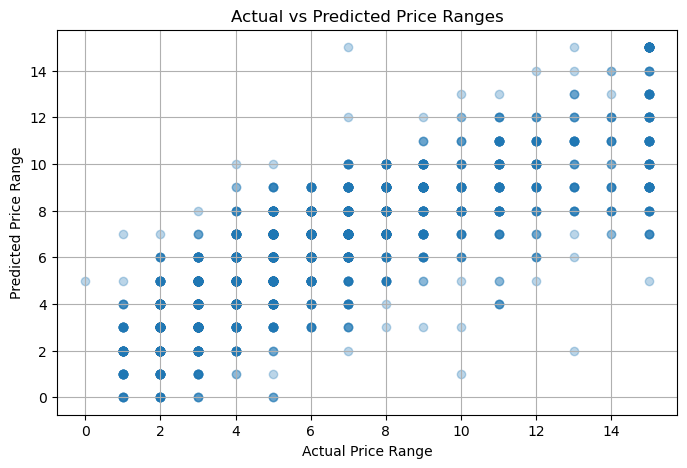

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load data
X = pd.read_csv('X_with_cluster_distances.csv')
Y = pd.read_csv('Y_Regression.csv')

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Convert median_house_value into price_range (0-15)
def convert_to_price_range(y_values):
    return np.clip((y_values // 30000).astype(int), 0, 15)

# Compute price ranges for y_train and y_test
y_train_range = convert_to_price_range(y_train)
y_test_range = convert_to_price_range(y_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict continuous house values
y_train_pred_reg = model.predict(X_train)
y_test_pred_reg = model.predict(X_test)

# Convert predictions to price ranges
y_train_pred_range = convert_to_price_range(y_train_pred_reg)
y_test_pred_range = convert_to_price_range(y_test_pred_reg)

# Evaluate classification performance
train_accuracy = accuracy_score(y_train_range, y_train_pred_range)
test_accuracy = accuracy_score(y_test_range, y_test_pred_range)
train_precision = precision_score(y_train_range, y_train_pred_range, average='weighted', zero_division=0)
test_precision = precision_score(y_test_range, y_test_pred_range, average='weighted', zero_division=0)
train_recall = recall_score(y_train_range, y_train_pred_range, average='weighted', zero_division=0)
test_recall = recall_score(y_test_range, y_test_pred_range, average='weighted', zero_division=0)

# Print results
print("=== Linear Regression followed by Price Range Classification ===")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Optional: Plot predicted vs actual price ranges
plt.figure(figsize=(8,5))
plt.scatter(y_test_range, y_test_pred_range, alpha=0.3)
plt.xlabel('Actual Price Range')
plt.ylabel('Predicted Price Range')
plt.title('Actual vs Predicted Price Ranges')
plt.grid(True)
plt.show()


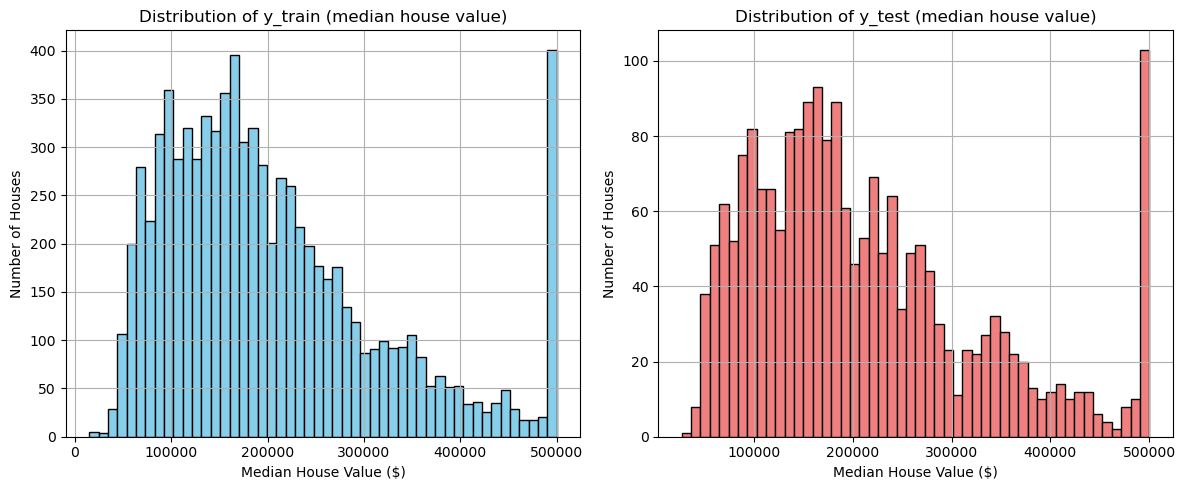

In [4]:
import matplotlib.pyplot as plt

# Plot histogram of training and testing target values
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of y_train (median house value)')
plt.xlabel('Median House Value ($)')
plt.ylabel('Number of Houses')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of y_test (median house value)')
plt.xlabel('Median House Value ($)')
plt.ylabel('Number of Houses')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Helper function to transform regression output into price range
def convert_to_price_range(y_values):
    return np.clip((y_values // 30000).astype(int), 0, 15)

# Function to train, predict, and evaluate
def train_and_evaluate_poly(X_train, X_test, y_train, y_test, degree):
    print(f"\n=== Polynomial Degree {degree} ===")

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred_reg = model.predict(X_train_poly)
    y_test_pred_reg = model.predict(X_test_poly)

    y_train_pred_range = convert_to_price_range(y_train_pred_reg)
    y_test_pred_range = convert_to_price_range(y_test_pred_reg)
    y_train_true_range = convert_to_price_range(y_train)
    y_test_true_range = convert_to_price_range(y_test)

    train_accuracy = accuracy_score(y_train_true_range, y_train_pred_range)
    test_accuracy = accuracy_score(y_test_true_range, y_test_pred_range)
    train_precision = precision_score(y_train_true_range, y_train_pred_range, average='weighted', zero_division=0)
    test_precision = precision_score(y_test_true_range, y_test_pred_range, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_true_range, y_train_pred_range, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_true_range, y_test_pred_range, average='weighted', zero_division=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Precision: {train_precision:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}")
    print(f"Test Recall: {test_recall:.4f}")

# Perform Polynomial Degree 2
train_and_evaluate_poly(X_train, X_test, y_train, y_test, degree=2)

# Perform Polynomial Degree 3
train_and_evaluate_poly(X_train, X_test, y_train, y_test, degree=3)
train_and_evaluate_poly(X_train, X_test, y_train, y_test, degree=4)


=== Polynomial Degree 2 ===
Train Accuracy: 0.2822
Test Accuracy: 0.2697
Train Precision: 0.3256
Test Precision: 0.3122
Train Recall: 0.2822
Test Recall: 0.2697

=== Polynomial Degree 3 ===
Train Accuracy: 0.3076
Test Accuracy: 0.2834
Train Precision: 0.3441
Test Precision: 0.3194
Train Recall: 0.3076
Test Recall: 0.2834

=== Polynomial Degree 4 ===
Train Accuracy: 0.3140
Test Accuracy: 0.2805
Train Precision: 0.3522
Test Precision: 0.3124
Train Recall: 0.3140
Test Recall: 0.2805


In [6]:
from sklearn.decomposition import PCA

def train_and_evaluate_pca(X_train, X_test, y_train, y_test, n_components):
    print(f"\n=== PCA Transformation (n_components={n_components}) ===")

    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    y_train_pred_reg = model.predict(X_train_pca)
    y_test_pred_reg = model.predict(X_test_pca)

    y_train_pred_range = convert_to_price_range(y_train_pred_reg)
    y_test_pred_range = convert_to_price_range(y_test_pred_reg)
    y_train_true_range = convert_to_price_range(y_train)
    y_test_true_range = convert_to_price_range(y_test)

    train_accuracy = accuracy_score(y_train_true_range, y_train_pred_range)
    test_accuracy = accuracy_score(y_test_true_range, y_test_pred_range)
    train_precision = precision_score(y_train_true_range, y_train_pred_range, average='weighted', zero_division=0)
    test_precision = precision_score(y_test_true_range, y_test_pred_range, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_true_range, y_train_pred_range, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_true_range, y_test_pred_range, average='weighted', zero_division=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Precision: {train_precision:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}")
    print(f"Test Recall: {test_recall:.4f}")

# Perform PCA transformation (e.g., reduce to 12 components)
train_and_evaluate_pca(X_train, X_test, y_train, y_test, n_components=12)


=== PCA Transformation (n_components=12) ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Train Precision: 0.2724
Test Precision: 0.2658
Train Recall: 0.2174
Test Recall: 0.2134


In [8]:
from sklearn.linear_model import Ridge

def train_and_evaluate_ridge(X_train, X_test, y_train, y_test, model_name, alpha=1.0):
    print(f"\n=== Ridge Regression ({model_name}), alpha={alpha} ===")

    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred_reg = model.predict(X_train)
    y_test_pred_reg = model.predict(X_test)

    y_train_pred_range = convert_to_price_range(y_train_pred_reg)
    y_test_pred_range = convert_to_price_range(y_test_pred_reg)
    y_train_true_range = convert_to_price_range(y_train)
    y_test_true_range = convert_to_price_range(y_test)

    train_accuracy = accuracy_score(y_train_true_range, y_train_pred_range)
    test_accuracy = accuracy_score(y_test_true_range, y_test_pred_range)
    train_precision = precision_score(y_train_true_range, y_train_pred_range, average='weighted', zero_division=0)
    test_precision = precision_score(y_test_true_range, y_test_pred_range, average='weighted', zero_division=0)
    train_recall = recall_score(y_train_true_range, y_train_pred_range, average='weighted', zero_division=0)
    test_recall = recall_score(y_test_true_range, y_test_pred_range, average='weighted', zero_division=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Precision: {train_precision:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Train Recall: {train_recall:.4f}")
    print(f"Test Recall: {test_recall:.4f}")

In [9]:
al = [0.001, 0.01, 0.1, 1, 10, 100]
for num in al:
    train_and_evaluate_ridge(X_train, X_test, y_train, y_test, model_name='Raw Features', alpha=num)


=== Ridge Regression (Raw Features), alpha=0.001 ===
Train Accuracy: 0.2192
Test Accuracy: 0.2173
Train Precision: 0.2746
Test Precision: 0.2724
Train Recall: 0.2192
Test Recall: 0.2173

=== Ridge Regression (Raw Features), alpha=0.01 ===
Train Accuracy: 0.2192
Test Accuracy: 0.2173
Train Precision: 0.2746
Test Precision: 0.2724
Train Recall: 0.2192
Test Recall: 0.2173

=== Ridge Regression (Raw Features), alpha=0.1 ===
Train Accuracy: 0.2192
Test Accuracy: 0.2173
Train Precision: 0.2746
Test Precision: 0.2724
Train Recall: 0.2192
Test Recall: 0.2173

=== Ridge Regression (Raw Features), alpha=1 ===
Train Accuracy: 0.2191
Test Accuracy: 0.2173
Train Precision: 0.2744
Test Precision: 0.2724
Train Recall: 0.2191
Test Recall: 0.2173

=== Ridge Regression (Raw Features), alpha=10 ===
Train Accuracy: 0.2191
Test Accuracy: 0.2173
Train Precision: 0.2743
Test Precision: 0.2723
Train Recall: 0.2191
Test Recall: 0.2173

=== Ridge Regression (Raw Features), alpha=100 ===
Train Accuracy: 0.2189


In [10]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
for num in al:
    train_and_evaluate_ridge(X_train_poly2, X_test_poly2, y_train, y_test, model_name='Poly Degree 2', alpha=num)


=== Ridge Regression (Poly Degree 2), alpha=0.001 ===
Train Accuracy: 0.2827
Test Accuracy: 0.2712
Train Precision: 0.3259
Test Precision: 0.3134
Train Recall: 0.2827
Test Recall: 0.2712

=== Ridge Regression (Poly Degree 2), alpha=0.01 ===
Train Accuracy: 0.2827
Test Accuracy: 0.2746
Train Precision: 0.3267
Test Precision: 0.3173
Train Recall: 0.2827
Test Recall: 0.2746

=== Ridge Regression (Poly Degree 2), alpha=0.1 ===
Train Accuracy: 0.2807
Test Accuracy: 0.2770
Train Precision: 0.3251
Test Precision: 0.3198
Train Recall: 0.2807
Test Recall: 0.2770

=== Ridge Regression (Poly Degree 2), alpha=1 ===
Train Accuracy: 0.2794
Test Accuracy: 0.2717
Train Precision: 0.3239
Test Precision: 0.3141
Train Recall: 0.2794
Test Recall: 0.2717

=== Ridge Regression (Poly Degree 2), alpha=10 ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.48187e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.37838e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.67621e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.2932e-20): result may not be accurate.
  return linalg.so

Train Accuracy: 0.2755
Test Accuracy: 0.2692
Train Precision: 0.3203
Test Precision: 0.3116
Train Recall: 0.2755
Test Recall: 0.2692

=== Ridge Regression (Poly Degree 2), alpha=100 ===
Train Accuracy: 0.2706
Test Accuracy: 0.2775
Train Precision: 0.3163
Test Precision: 0.3218
Train Recall: 0.2706
Test Recall: 0.2775


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.31695e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [12]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
for num in al:
    train_and_evaluate_ridge(X_train_poly3, X_test_poly3, y_train, y_test, model_name='Poly Degree 3', alpha=1.0)


=== Ridge Regression (Poly Degree 3), alpha=1.0 ===
Train Accuracy: 0.3260
Test Accuracy: 0.2888
Train Precision: 0.3589
Test Precision: 0.3227
Train Recall: 0.3260
Test Recall: 0.2888

=== Ridge Regression (Poly Degree 3), alpha=1.0 ===
Train Accuracy: 0.3260
Test Accuracy: 0.2888
Train Precision: 0.3589
Test Precision: 0.3227
Train Recall: 0.3260
Test Recall: 0.2888

=== Ridge Regression (Poly Degree 3), alpha=1.0 ===
Train Accuracy: 0.3260
Test Accuracy: 0.2888
Train Precision: 0.3589
Test Precision: 0.3227
Train Recall: 0.3260
Test Recall: 0.2888

=== Ridge Regression (Poly Degree 3), alpha=1.0 ===
Train Accuracy: 0.3260
Test Accuracy: 0.2888
Train Precision: 0.3589
Test Precision: 0.3227
Train Recall: 0.3260
Test Recall: 0.2888

=== Ridge Regression (Poly Degree 3), alpha=1.0 ===
Train Accuracy: 0.3260
Test Accuracy: 0.2888
Train Precision: 0.3589
Test Precision: 0.3227
Train Recall: 0.3260
Test Recall: 0.2888

=== Ridge Regression (Poly Degree 3), alpha=1.0 ===
Train Accuracy: 0

In [13]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
for num in al:
    train_and_evaluate_ridge(X_train_pca, X_test_pca, y_train, y_test, model_name='PCA n=12', alpha=1.0)


=== Ridge Regression (PCA n=12), alpha=1.0 ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Train Precision: 0.2724
Test Precision: 0.2658
Train Recall: 0.2174
Test Recall: 0.2134

=== Ridge Regression (PCA n=12), alpha=1.0 ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Train Precision: 0.2724
Test Precision: 0.2658
Train Recall: 0.2174
Test Recall: 0.2134

=== Ridge Regression (PCA n=12), alpha=1.0 ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Train Precision: 0.2724
Test Precision: 0.2658
Train Recall: 0.2174
Test Recall: 0.2134

=== Ridge Regression (PCA n=12), alpha=1.0 ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Train Precision: 0.2724
Test Precision: 0.2658
Train Recall: 0.2174
Test Recall: 0.2134

=== Ridge Regression (PCA n=12), alpha=1.0 ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Train Precision: 0.2724
Test Precision: 0.2658
Train Recall: 0.2174
Test Recall: 0.2134

=== Ridge Regression (PCA n=12), alpha=1.0 ===
Train Accuracy: 0.2174
Test Accuracy: 0.2134
Tr